In [1]:
import yfinance as yf
import numpy as np

In [2]:
import pandas as pd

In [17]:
from matplotlib import pyplot as plt

In [7]:
# Read nifty last year data
nifty_data = pd.read_csv("Nifty50.csv")

In [57]:
# Closeing prices ,is what we base our simluations
nifty_daily_returns = nifty_data["Close"].pct_change()[1:]
print(np.mean(nifty_daily_returns))

0.00016793635483612304


In [39]:
# Nifty drawdown from last year
close_prices = list(nifty_data["Close"])
close_prices.index(max(close_prices))
print((min(close_prices[ind_max:]) - max(close_prices))/max(close_prices))

-0.13469767441860464


In [58]:
# Nifty daily returns standard deviation
nifty_standard_deviation = nifty_daily_returns.std()
print(nifty_standard_deviation)

0.010892960588578882


In [11]:
#NIfty daily returns means
nifty_mean = np.mean(nifty_daily_returns)

## Modelling the Expected Returns for the upcoming year.
####  The distribution used for the daily returns normal. The mean and the standrad deviation was used from the last year's data. We convert the daily returns into asset prices and then we use the maximum drawdown formulae for each iteration, to find out the maximum, drawdown in each year. 

In [52]:
mean_returns = []
drawdown = []
for k in range(10000):
    pct_change = np.random.normal(nifty_mean, nifty_standard_deviation, size = len(nifty_data))
    mean_returns.append(np.mean(pct_change))
    start_price = list(nifty_data["Close"])[-1]
    close_prices = []
    for k in pct_change:
        close_prices.append((1 + k)*start_price)
        start_prices = close_prices[-1]
    ind_max = close_prices.index(max(close_prices))
    maximum_drawdown = (min(close_prices[ind_max:]) - max(close_prices))/max(close_prices)
    maximum_drawdown = maximum_drawdown*100
    drawdown.append(maximum_drawdown)

In [53]:
#Converting the mean returns to percent expected returns
for i in range(len(mean_returns)):
    mean_returns[i] = mean_returns[i]*100

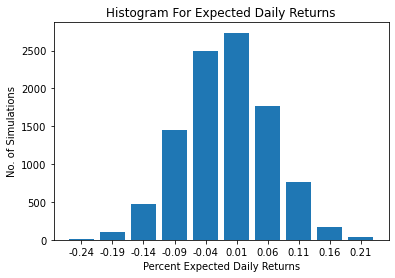

In [61]:
num_bins = 10
bin_range = (np.min(mean_returns), np.max(mean_returns))
bin_counts, bin_edges = np.histogram(mean_returns, bins=num_bins, range=bin_range)
bar_positions = np.arange(num_bins)
plt.bar(bar_positions, bin_counts, align='center')
plt.xlabel('Percent Expected Daily Returns')
plt.ylabel('No. of Simulations')
plt.title('Histogram For Expected Daily Returns')
bin_labels = [round(np.min(mean_returns) + (i/10)*(np.max(mean_returns) - np.min(mean_returns)), 2) for i in range(num_bins)]
plt.xticks(bar_positions, bin_labels)
plt.show()

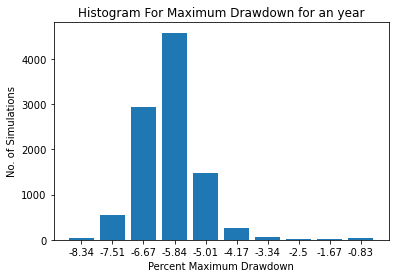

In [62]:
num_bins = 10
bin_range = (np.min(drawdown), np.max(drawdown))
bin_counts, bin_edges = np.histogram(drawdown, bins=num_bins, range=bin_range)
bar_positions = np.arange(num_bins)
plt.bar(bar_positions, bin_counts, align='center')
plt.xlabel('Percent Maximum Drawdown')
plt.ylabel('No. of Simulations')
plt.title('Histogram For Maximum Drawdown for an year')
bin_labels = [round(np.min(drawdown) + (i/10)*(np.max(drawdown) - np.min(drawdown)), 2) for i in range(num_bins)]
plt.xticks(bar_positions, bin_labels)
plt.show()

In [ ]:
np.mean()